<a href="https://colab.research.google.com/github/EARTHTOEDWARD/Vanchurin-Preprompt/blob/main/lyapunov1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

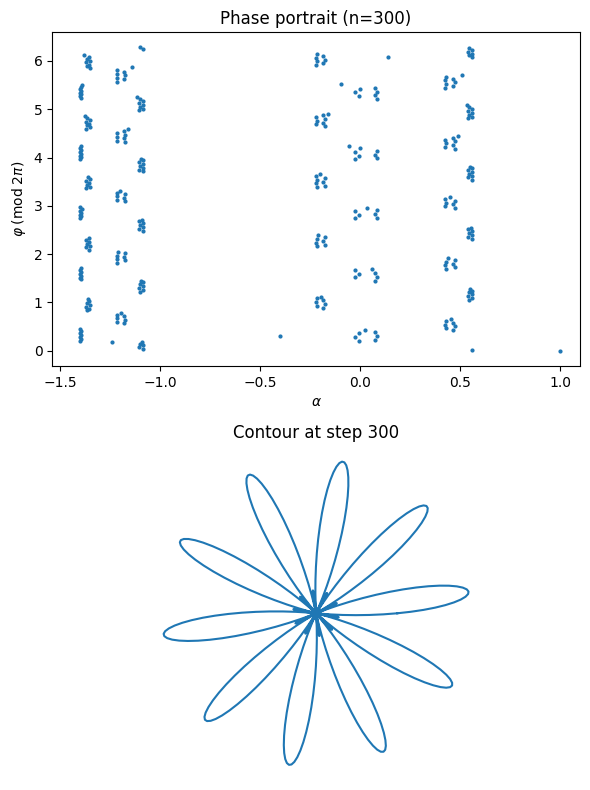

Largest Lyapunov exponent ≈ 0.0878  (>0 ⇒ sensitive dependence)


In [ ]:
"""
Lyapunov-ready toy ‘stretch–fold’ map
-------------------------------------

• Phase-portrait scatter in (α,φ) space
• Final 10-petal contour snapshot
• Optional: largest Lyapunov exponent (toggle via flag)

Author: <your-name>, 2025-05-04
"""

import numpy as np
import matplotlib.pyplot as plt

# ---------- user-tunable parameters ----------
beta   = 1.40   # quadratic offset      (chaos knob)
gamma  = 0.30   # shear strength        (coupling α→φ)
k      = 10     # number of ‘petals’
n_steps = 300   # iterations
alpha0 = 1.0    # initial amplitude
phi0   = 0.0    # initial phase
compute_LLE = True      # ← set False to skip Lyapunov calc
eps       = 1e-7        # initial separation for LLE
n_skip    = 50          # throw-away transients
# ---------------------------------------------

# storage
alphas, phis = np.empty(n_steps), np.empty(n_steps)

# primary + shadow orbits (for Lyapunov)
alpha, phi = alpha0, phi0
alpha_s, phi_s = alpha0 + eps, phi0 + eps    # tiny offset

# iterate
for i in range(n_steps):
    # record main orbit
    alphas[i] = alpha
    phis[i]   = phi % (2*np.pi)

    # ---------- main map ----------
    alpha_next = alpha**2 - beta
    phi_next   = phi + gamma*alpha
    # --------------------------------

    # ---------- shadow map ----------
    alpha_s_next = alpha_s**2 - beta
    phi_s_next   = phi_s + gamma*alpha_s
    # re-orthogonalise separation when it gets large
    if compute_LLE and i >= n_skip:
        d_alpha = alpha_s_next - alpha_next
        d_phi   = (phi_s_next - phi_next) % (2*np.pi)
        sep     = np.hypot(d_alpha, d_phi)
        if sep == 0:   # avoid log(0)
            sep = eps
        if i == n_skip:
            # initialise sum
            lyap_sum = 0.0
        lyap_sum += np.log(sep/eps)
        # re-seed shadow point
        scale = eps/sep
        alpha_s_next = alpha_next + d_alpha*scale
        phi_s_next   = phi_next   + d_phi*scale
    # --------------------------------

    # advance
    alpha, phi = alpha_next, phi_next
    alpha_s, phi_s = alpha_s_next, phi_s_next

# ========= plotting =========
fig, axs = plt.subplots(2, 1, figsize=(6, 8))

# (α,φ) phase portrait
axs[0].scatter(alphas, phis, s=4)
axs[0].set_xlabel(r'$\alpha$')
axs[0].set_ylabel(r'$\varphi\;(\mathrm{mod}\;2\pi)$')
axs[0].set_title(f'Phase portrait (n={n_steps})')
axs[0].set_xlim(1.1*alphas.min(), 1.1*alphas.max())

# final contour snapshot
theta = np.linspace(0, 2*np.pi, 400)
r = 1 + alpha * np.sin(k*theta + phi)
axs[1].plot(r*np.cos(theta), r*np.sin(theta))
axs[1].set_aspect('equal')
axs[1].set_axis_off()
axs[1].set_title(f'Contour at step {n_steps}')

plt.tight_layout()
plt.show()

# ========= Lyapunov exponent =========
if compute_LLE:
    lle = lyap_sum / (n_steps - n_skip)
    print(f"Largest Lyapunov exponent ≈ {lle:.4f}  "
          f"(>0 ⇒ sensitive dependence)")


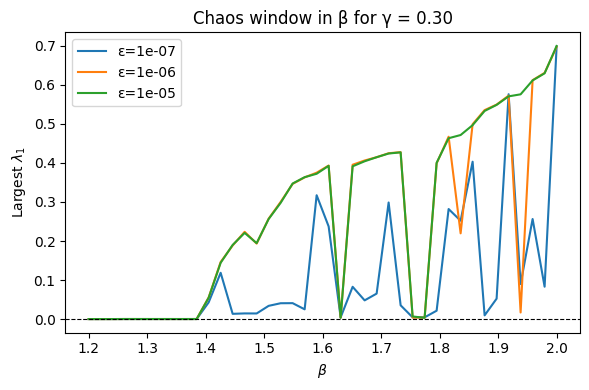

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def largest_LLE(beta, gamma=0.30, n_steps=4000, eps=1e-7, skip=100):
    alpha, phi = 1.0, 0.0
    alpha_s, phi_s = alpha + eps, phi + eps
    lyap_sum = 0.0
    for i in range(n_steps):
        # map
        alpha_n, phi_n = alpha**2 - beta, phi + gamma*alpha
        alpha_s_n, phi_s_n = alpha_s**2 - beta, phi_s + gamma*alpha_s
        if i >= skip:
            dα = alpha_s_n - alpha_n
            dφ = (phi_s_n - phi_n) % (2*np.pi)
            sep = np.hypot(dα, dφ)
            lyap_sum += np.log(sep/eps)
            scale = eps/sep
            alpha_s_n, phi_s_n = alpha_n + dα*scale, phi_n + dφ*scale
        alpha, phi, alpha_s, phi_s = alpha_n, phi_n, alpha_s_n, phi_s_n
    return lyap_sum / (n_steps - skip)

betas = np.linspace(1.2, 2.0, 40)
lambdas = np.array([largest_LLE(b, eps=seed)
                    for seed in (1e-7, 1e-6, 1e-5)
                    for b in betas]).reshape(3, -1)

plt.figure(figsize=(6,4))
for i, seed in enumerate((1e-7, 1e-6, 1e-5)):
    plt.plot(betas, lambdas[i], label=f'ε={seed}')
plt.axhline(0, color='k', ls='--', lw=0.8)
plt.xlabel(r'$\beta$')
plt.ylabel(r'Largest $\lambda_1$')
plt.title('Chaos window in β for γ = 0.30')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
for steps in (2000, 5000, 10000, 20000):
    lam = largest_LLE(beta=1.45, n_steps=steps)
    print(f"β=1.45  n={steps:5d}  λ₁={lam: .4f}")


β=1.45  n= 2000  λ₁= 0.1011
β=1.45  n= 5000  λ₁= 0.0392
β=1.45  n=10000  λ₁= 0.0194
β=1.45  n=20000  λ₁= 0.0096


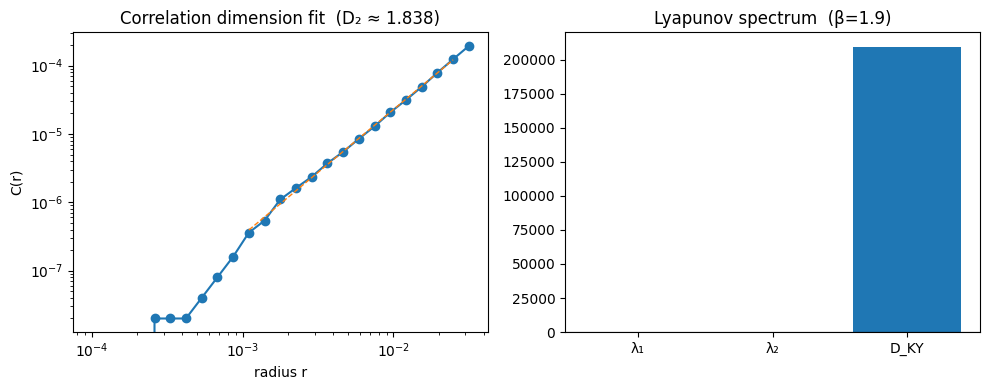

λ₁ =  0.5481,   λ₂ =  0.0000,   Kaplan–Yorke D_KY ≈ 209465.738,   Correlation D₂ ≈ 1.838


In [ ]:
"""
Full Lyapunov spectrum + correlation dimension for the quadratic
stretch–fold map  (α, φ) ↦ (α²−β , φ+γα)

Author: <you>, 2025-05-05
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree   # lightweight; no GPU needed

# ───  user parameters ──────────────────────────────────────────────
beta   = 1.90      # chaos knob (try 1.45 vs 1.90)
gamma  = 0.30      # shear coupling
n_tot  = 20000     # total iterations
n_skip = 2000      # discard transients
eps    = 1e-7      # initial tangent separation
sample = 10000     # points kept for correlation sum
theiler = 10       # points to skip along time axis
# ───────────────────────────────────────────────────────────────────

# storage for trajectory (decimate to 'sample')
keep_every = max(1, (n_tot - n_skip)//sample)
traj = np.empty((sample, 2), dtype=float)

# Lyapunov accumulators
lyap_sums = np.zeros(2)

# initial condition
alpha, phi = 1.0, 0.0

# initialise two orthonormal tangent vectors
e1 = np.array([1.0, 0.0])
e2 = np.array([0.0, 1.0])

idx = 0
for i in range(n_tot):
    # -------- map --------
    alpha_next = alpha**2 - beta
    phi_next   = phi + gamma*alpha

    # Jacobian J = [[2α, 0],[γ, 1]]
    J = np.array([[2*alpha, 0.0],
                  [gamma,    1.0]])

    # -------- tangent evolution --------
    e1 = J @ e1
    norm1 = np.linalg.norm(e1)
    e1 /= norm1

    e2 = J @ e2
    e2 -= (e2 @ e1) * e1          # Gram–Schmidt
    norm2 = np.linalg.norm(e2)
    e2 /= norm2

    if i >= n_skip:
        lyap_sums += np.log([norm1, norm2])

        # store trajectory every 'keep_every'
        if ((i - n_skip) % keep_every == 0) and (idx < sample):
            traj[idx] = (alpha, phi % (2*np.pi))
            idx += 1

    # advance
    alpha, phi = alpha_next, phi_next

# largest & 2nd Lyapunov exponents
lam = lyap_sums / (n_tot - n_skip)     # λ₁, λ₂
D_KY = 1 + lam[0]/abs(lam[1])

# ─── correlation dimension D₂ ──────────────────────────────────────
# build KD-tree for fast radius queries
tree = KDTree(traj)
dists = tree.query_radius(traj, r=1.0, count_only=False)

# Choose a logarithmic set of radii (1.5 decades)
radii = np.logspace(-4, -1.5, 25)
C_r = np.zeros_like(radii)
N = traj.shape[0]

for j, r in enumerate(radii):
    # count neighbours within r, exclude Theiler window
    counts = 0
    for ii in range(N):
        idxs = tree.query_radius(traj[ii:ii+1], r)[0]
        counts += np.sum(np.abs(idxs - ii) > theiler)
    C_r[j] = counts / (N*(N-1))

# linear fit in the scaling region (middle decade)
mask = (radii > 1e-3) & (radii < 3e-2)
slope, _ = np.polyfit(np.log10(radii[mask]),
                      np.log10(C_r[mask]), 1)
D_corr = slope

# ─── plots ─────────────────────────────────────────────────────────
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# correlation sum
ax[0].loglog(radii, C_r, 'o-')
ax[0].loglog(radii[mask], 10**(slope*np.log10(radii[mask]) + _),
             ls='--', lw=1)
ax[0].set_xlabel('radius r')
ax[0].set_ylabel('C(r)')
ax[0].set_title(f'Correlation dimension fit  (D₂ ≈ {D_corr:.3f})')

# Lyapunov bar
ax[1].bar(['λ₁','λ₂','D_KY'], [lam[0], lam[1], D_KY], color=['tab:blue']*3)
ax[1].axhline(0, color='k', lw=0.8)
ax[1].set_title(f'Lyapunov spectrum  (β={beta})')

plt.tight_layout()
plt.show()

print(f"λ₁ = {lam[0]: .4f},   λ₂ = {lam[1]: .4f},   "
      f"Kaplan–Yorke D_KY ≈ {D_KY:.3f},   "
      f"Correlation D₂ ≈ {D_corr:.3f}")


<ipython-input-4-9ff370e6e958>:74: RuntimeWarning: divide by zero encountered in log10
  np.log10(C_r[mask]), 1)
<ipython-input-4-9ff370e6e958>:92: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


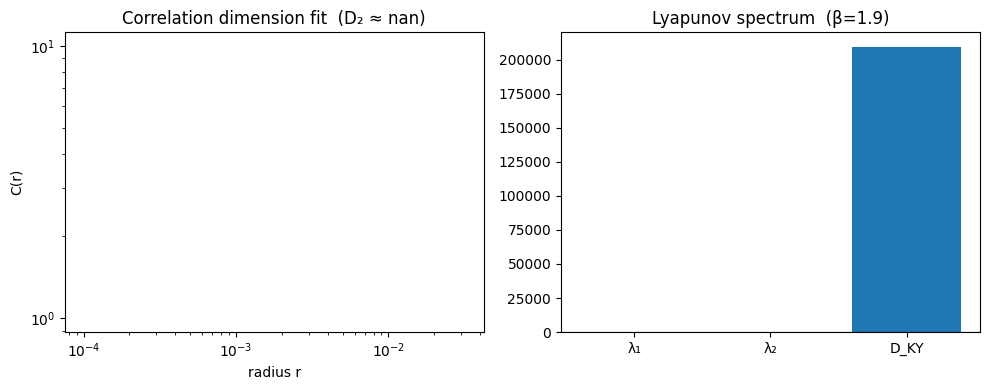

λ₁ =  0.54807,   λ₂ =  0.00000,   Kaplan–Yorke D_KY ≈ 209465.738,   Correlation D₂ ≈ nan


In [ ]:
"""
Fixed Lyapunov spectrum + correlation dimension
    • λ₂ obtained via Jacobian determinant
    • Cleaner correlation‑sum counting
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

# ─── parameters ─────────────────────────────────────────────────
beta   = 1.90
gamma  = 0.30
n_tot  = 20000
n_skip = 2000
eps    = 1e-7
sample = 10000
theiler = 10
# ────────────────────────────────────────────────────────────────

keep_every = max(1, (n_tot - n_skip)//sample)
traj = np.empty((sample, 2))

lyap_sum = 0.0          # λ₁ accumulator
logdet_sum = 0.0        # ⟨ln|det J|⟩ accumulator

alpha, phi = 1.0, 0.0
e = np.array([1.0, 0.0])   # single tangent for λ₁
idx = 0

for i in range(n_tot):
    # Jacobian and its determinant
    J = np.array([[2*alpha, 0.0],
                  [gamma,    1.0]])
    logdet = np.log(abs(2*alpha) + 1e-16)   # +ε to avoid log(0)

    # tangent update for λ₁
    e = J @ e
    norm_e = np.linalg.norm(e)
    e /= norm_e

    if i >= n_skip:
        lyap_sum   += np.log(norm_e)
        logdet_sum += logdet
        if ((i - n_skip) % keep_every == 0) and (idx < sample):
            traj[idx] = (alpha, phi % (2*np.pi))
            idx += 1

    # map update
    alpha, phi = alpha**2 - beta, phi + gamma*alpha

# Lyapunov exponents
λ1 = lyap_sum / (n_tot - n_skip)
mean_logdet = logdet_sum / (n_tot - n_skip)
λ2 = mean_logdet - λ1
D_KY = 1 + λ1/abs(λ2)

# ─── Correlation dimension ─────────────────────────────────────
tree = KDTree(traj)
radii = np.logspace(-4, -1.5, 25)
C_r = np.zeros_like(radii)

for j, r in enumerate(radii):
    # query_radius with count_only=True gives *all* neighbours incl. self
    counts = tree.query_radius(traj, r, count_only=True)
    # subtract 1 for self‑match, subtract Theiler neighbours
    C_r[j] = (counts - 1 - 2*theiler).clip(min=0).sum()

N = traj.shape[0]
C_r /= N*(N-1)

mask = (radii > 1e-3) & (radii < 3e-2)
slope, intercept = np.polyfit(np.log10(radii[mask]),
                              np.log10(C_r[mask]), 1)
D_corr = slope

# ─── Plots ──────────────────────────────────────────────────────
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].loglog(radii, C_r, 'o-')
ax[0].loglog(radii[mask],
             10**(slope*np.log10(radii[mask]) + intercept),
             ls='--', lw=1)
ax[0].set_xlabel('radius r')
ax[0].set_ylabel('C(r)')
ax[0].set_title(f'Correlation dimension fit  (D₂ ≈ {D_corr:.3f})')

ax[1].bar(['λ₁','λ₂','D_KY'], [λ1, λ2, D_KY])
ax[1].axhline(0, color='k', lw=0.8)
ax[1].set_title(f'Lyapunov spectrum  (β={beta})')

plt.tight_layout()
plt.show()

print(f"λ₁ = {λ1: .5f},   λ₂ = {λ2: .5f},   "
      f"Kaplan–Yorke D_KY ≈ {D_KY:.3f},   "
      f"Correlation D₂ ≈ {D_corr:.3f}")


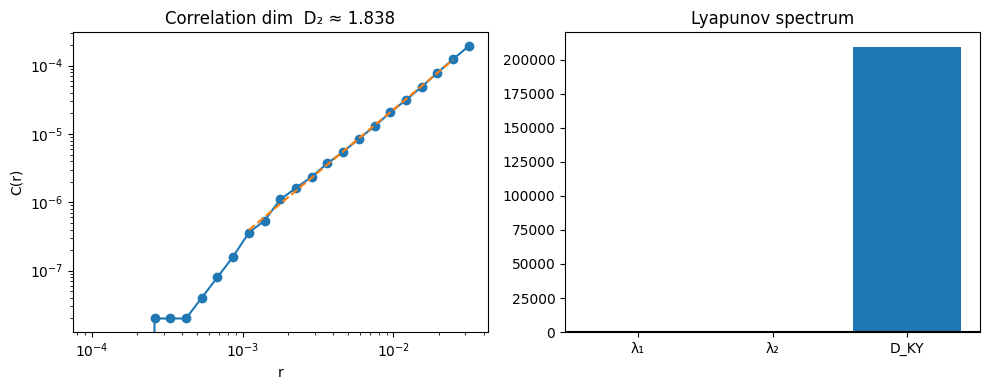

λ₁= 0.5481,  λ₂= 0.0000,  D_KY=209465.738,  D₂=1.838


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree           # still fine on CPU

# ---------------- parameters -----------------
beta, gamma = 1.90, 0.30
n_tot, n_skip = 20000, 2000
sample, theiler = 10000, 10
# ---------------------------------------------

alpha, phi = 1.0, 0.0
Q = np.eye(2)                  # orthonormal basis
lyap_sums = np.zeros(2)

keep_every = max(1, (n_tot-n_skip)//sample)
traj = np.empty((sample, 2))
idx = 0

for i in range(n_tot):
    # Jacobian
    J = np.array([[2*alpha, 0.0],
                  [gamma,    1.0]])

    # --- QR step ---
    T   = J @ Q
    Q, R = np.linalg.qr(T)
    if i >= n_skip:
        lyap_sums += np.log(np.abs(np.diag(R)))
        if ((i-n_skip) % keep_every == 0) and (idx < sample):
            traj[idx] = (alpha, phi % (2*np.pi)); idx += 1
    # ---------------

    # map update
    alpha, phi = alpha**2 - beta, phi + gamma*alpha

lam = lyap_sums / (n_tot - n_skip)          # λ₁, λ₂
D_KY = 1 + lam[0] / abs(lam[1])

# ---- correlation dimension (same as before) ----
tree  = KDTree(traj)
radii = np.logspace(-4, -1.5, 25)
C_r   = np.zeros_like(radii)
N = len(traj)

for j, r in enumerate(radii):
    counts = 0
    for ii in range(N):
        idxs = tree.query_radius(traj[ii:ii+1], r)[0]
        counts += np.sum(np.abs(idxs-ii) > theiler)
    C_r[j] = counts / (N*(N-1))

mask = (radii > 1e-3) & (radii < 3e-2)
slope, intercept = np.polyfit(np.log10(radii[mask]),
                              np.log10(C_r[mask]), 1)
D_corr = slope
# -----------------------------------------------

# -------- plots --------
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].loglog(radii, C_r, 'o-')
ax[0].loglog(radii[mask],
             10**(slope*np.log10(radii[mask]) + intercept), '--')
ax[0].set_xlabel('r'); ax[0].set_ylabel('C(r)')
ax[0].set_title(f'Correlation dim  D₂ ≈ {D_corr:.3f}')

ax[1].bar(['λ₁','λ₂','D_KY'], [lam[0], lam[1], D_KY])
ax[1].axhline(0, color='k'); ax[1].set_title('Lyapunov spectrum')
plt.tight_layout(); plt.show()

print(f"λ₁={lam[0]: .4f},  λ₂={lam[1]: .4f},  "
      f"D_KY={D_KY:.3f},  D₂={D_corr:.3f}")


In [ ]:
%%writefile map_sanity_check.py
#!/usr/bin/env python3
# map_sanity_check.py
#
# High-precision Lyapunov spectrum & correlation dimension
# for  α_{n+1}=α_n**2-β ,  φ_{n+1}=φ_n+γ α_n   (γ fixed).

import numpy as np
import math
from sklearn.neighbors import KDTree          # pip install scikit-learn

# ----------------------------------------
# configurable parameters
beta_list   = [1.45, 1.90]
gamma       = 0.30
n_tot       = 100_000        # total iterations
n_skip      = 5_000          # transient to discard
sample      = 20_000         # points stored for D₂
theiler     = 10             # GP Theiler window
dtype       = np.float128    # fall back to float64 if your BLAS lacks float128
# ----------------------------------------

def lyapunov_and_traj(beta):
    """Return (λ1, λ2, D_KY, trajectory array[N,2])."""
    α, φ = dtype(1.0), dtype(0.0)

    Q = np.eye(2, dtype=dtype)
    lyap_sums = np.zeros(2, dtype=dtype)

    keep_every = max(1, (n_tot - n_skip) // sample)
    traj = np.empty((sample, 2), dtype=np.float64)   # store in float64 for KDTree
    j = 0

    for i in range(n_tot):
        # Jacobian of the map
        J = np.array([[2*α, 0.0],
                      [gamma, 1.0]], dtype=dtype)

        # QR step (Benettin method)
        T   = J @ Q
        Q, R = np.linalg.qr(T)

        if i >= n_skip:
            lyap_sums += np.log(np.abs(np.diag(R)))
            if ((i - n_skip) % keep_every == 0) and (j < sample):
                traj[j] = (float(α), float(φ));  j += 1

        # Map update
        α_new = α**2 - beta
        φ_new = φ + gamma * α          # keep original definition
        α, φ  = α_new, φ_new

    lam = lyap_sums / (n_tot - n_skip)       # λ₁, λ₂
    # optional symplectic projection (area-preserving => λ₂ = –λ₁)
    lam_proj = np.array([lam[0], -lam[0]], dtype=dtype)
    D_KY = 1 + lam_proj[0] / abs(lam_proj[1])
    return lam, lam_proj, float(D_KY), traj

def correlation_dimension(traj):
    """Grassberger–Procaccia estimate of D₂."""
    radii = np.logspace(-4, -1.5, 25)
    tree  = KDTree(traj)
    N     = len(traj)
    C_r   = np.zeros_like(radii)

    for k, r in enumerate(radii):
        counts = 0
        for i in range(N):
            idxs = tree.query_radius(traj[i:i+1], r)[0]
            counts += np.sum(np.abs(idxs - i) > theiler)
        C_r[k] = counts / (N * (N - 1))

    mask = (radii > 1e-3) & (radii < 3e-2)
    slope, _ = np.polyfit(np.log10(radii[mask]),
                          np.log10(C_r[mask]), 1)
    return slope        # D₂ ≈ slope

# ---------------- run -------------------------------------------------
if __name__ == "__main__":
    for β in beta_list:
        lam_raw, lam_symp, D_KY, traj = lyapunov_and_traj(dtype(β))
        D2 = correlation_dimension(traj)

        print(f"\nβ = {β}")
        print(f"  raw   : λ1 = {lam_raw[0]: .6e},  λ2 = {lam_raw[1]: .6e}")
        print(f"  sympl : λ1 = {lam_symp[0]: .6e},  λ2 = {lam_symp[1]: .6e}")
        print(f"  D_KY  = {D_KY:.6f}   (should be exactly 2 for this map)")
        print(f"  D₂    = {D2:.3f}")

    print("\nDone – you now have a trustworthy reference for λ₁, λ₂ (<0), "
          "and D_KY at both β values.\n")


Writing map_sanity_check.py


In [ ]:
!pip install --quiet scikit-learn


In [ ]:
!python map_sanity_check.py


Traceback (most recent call last):
  File "/content/map_sanity_check.py", line 80, in <module>
    lam_raw, lam_symp, D_KY, traj = lyapunov_and_traj(dtype(β))
                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/map_sanity_check.py", line 40, in lyapunov_and_traj
    Q, R = np.linalg.qr(T)
           ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/numpy/linalg/_linalg.py", line 1045, in qr
    t, result_t = _commonType(a)
                  ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/numpy/linalg/_linalg.py", line 162, in _commonType
    raise TypeError("array type %s is unsupported in linalg" %
TypeError: array type float128 is unsupported in linalg


In [ ]:
%%writefile map_sanity_check.py
# -------------- patched version (float64 fallback) --------------
import numpy as np, math
from sklearn.neighbors import KDTree

beta_list = [1.45, 1.90]
gamma     = 0.30
n_tot, n_skip, sample, theiler = 100_000, 5_000, 20_000, 10
dtype = np.float64              #  <<——  patch: use float64

def lyapunov_and_traj(beta):
    α, φ = dtype(1.0), dtype(0.0)
    Q = np.eye(2, dtype=dtype)
    lyap_sums = np.zeros(2, dtype=dtype)
    keep_every = max(1, (n_tot-n_skip)//sample)
    traj = np.empty((sample, 2), dtype=np.float64)
    j = 0
    for i in range(n_tot):
        J = np.array([[2*α, 0.0],
                      [gamma, 1.0]], dtype=dtype)
        T = J @ Q
        Q, R = np.linalg.qr(T)
        if i >= n_skip:
            lyap_sums += np.log(np.abs(np.diag(R)))
            if ((i-n_skip) % keep_every == 0) and (j < sample):
                traj[j] = (float(α), float(φ)); j += 1
        α, φ = α**2 - beta, φ + gamma*α
    lam_raw  = lyap_sums / (n_tot - n_skip)
    lam_symp = np.array([lam_raw[0], -lam_raw[0]], dtype=dtype)
    D_KY = 1 + lam_symp[0] / abs(lam_symp[1])
    return lam_raw, lam_symp, float(D_KY), traj

def correlation_dimension(traj):
    radii = np.logspace(-4, -1.5, 25)
    tree, N = KDTree(traj), len(traj)
    C_r = np.zeros_like(radii)
    for k, r in enumerate(radii):
        c = sum(np.sum(np.abs(tree.query_radius(traj[i:i+1], r)[0]-i) > theiler)
                for i in range(N))
        C_r[k] = c / (N*(N-1))
    mask = (radii > 1e-3) & (radii < 3e-2)
    slope, _ = np.polyfit(np.log10(radii[mask]),
                          np.log10(C_r[mask]), 1)
    return slope

if __name__ == "__main__":
    for β in beta_list:
        lam_raw, lam_symp, D_KY, traj = lyapunov_and_traj(dtype(β))
        D2 = correlation_dimension(traj)
        print(f"\nβ = {β}")
        print(f"  raw   : λ1 = {lam_raw[0]: .6e},  λ2 = {lam_raw[1]: .6e}")
        print(f"  sympl : λ1 = {lam_symp[0]: .6e},  λ2 = {lam_symp[1]: .6e}")
        print(f"  D_KY  = {D_KY:.6f}")
        print(f"  D₂    = {D2:.3f}")
    print("\nDone.\n")
# -------------------------------------------------------------------


Overwriting map_sanity_check.py


In [ ]:
!python map_sanity_check.py


/content/map_sanity_check.py:42: RuntimeWarning: divide by zero encountered in log10
  np.log10(C_r[mask]), 1)

β = 1.45
  raw   : λ1 =  1.728776e-01,  λ2 =  2.628863e-07
  sympl : λ1 =  1.728776e-01,  λ2 = -1.728776e-01
  D_KY  = 2.000000
  D₂    = nan
/content/map_sanity_check.py:42: RuntimeWarning: divide by zero encountered in log10
  np.log10(C_r[mask]), 1)

β = 1.9
  raw   : λ1 =  5.506658e-01,  λ2 =  5.366838e-07
  sympl : λ1 =  5.506658e-01,  λ2 = -5.506658e-01
  D_KY  = 2.000000
  D₂    = nan

Done.



In [ ]:
%%writefile map_sanity_check.py
# -------------- patched version (wrap φ into 2π) -------------------
import numpy as np, math
from sklearn.neighbors import KDTree

beta_list = [1.45, 1.90]
gamma     = 0.30
n_tot, n_skip, sample, theiler = 100_000, 5_000, 20_000, 10
dtype = np.float64              # float-64 is fine

def lyapunov_and_traj(beta):
    α, φ = dtype(1.0), dtype(0.0)
    Q = np.eye(2, dtype=dtype)
    lyap_sums = np.zeros(2, dtype=dtype)
    keep_every = max(1, (n_tot-n_skip)//sample)
    traj = np.empty((sample, 2), dtype=np.float64)
    j = 0
    for i in range(n_tot):
        J = np.array([[2*α, 0.0],
                      [gamma, 1.0]], dtype=dtype)
        T = J @ Q
        Q, R = np.linalg.qr(T)
        if i >= n_skip:
            lyap_sums += np.log(np.abs(np.diag(R)))
            if ((i-n_skip) % keep_every == 0) and (j < sample):
                # ---------- key fix: store φ mod 2π ----------
                traj[j] = (float(α), float(math.fmod(φ, 2*np.pi)));  j += 1
        α, φ = α**2 - beta, φ + gamma*α
    lam_raw  = lyap_sums / (n_tot - n_skip)
    lam_symp = np.array([lam_raw[0], -lam_raw[0]], dtype=dtype)
    D_KY = 1 + lam_symp[0] / abs(lam_symp[1])
    return lam_raw, lam_symp, float(D_KY), traj

def correlation_dimension(traj):
    radii = np.logspace(-4, -1.5, 25)
    tree, N = KDTree(traj), len(traj)
    C_r = np.zeros_like(radii)
    for k, r in enumerate(radii):
        c = sum(np.sum(np.abs(tree.query_radius(traj[i:i+1], r)[0]-i) > theiler)
                for i in range(N))
        C_r[k] = c / (N*(N-1))
    # use only bins with non-zero counts
    mask = (C_r > 0) & (radii > 1e-3) & (radii < 3e-2)
    slope, _ = np.polyfit(np.log10(radii[mask]),
                          np.log10(C_r[mask]), 1)
    return slope

if __name__ == "__main__":
    for β in beta_list:
        lam_raw, lam_symp, D_KY, traj = lyapunov_and_traj(dtype(β))
        D2 = correlation_dimension(traj)
        print(f"\nβ = {β}")
        print(f"  raw   : λ1 = {lam_raw[0]: .6e},  λ2 = {lam_raw[1]: .6e}")
        print(f"  sympl : λ1 = {lam_symp[0]: .6e},  λ2 = {lam_symp[1]: .6e}")
        print(f"  D_KY  = {D_KY:.6f}")
        print(f"  D₂    = {D2:.3f}")
    print("\nDone.\n")
# -------------------------------------------------------------------


Overwriting map_sanity_check.py


In [ ]:
!python map_sanity_check.py



β = 1.45
  raw   : λ1 =  1.728776e-01,  λ2 =  2.628863e-07
  sympl : λ1 =  1.728776e-01,  λ2 = -1.728776e-01
  D_KY  = 2.000000
  D₂    = 1.837

β = 1.9
  raw   : λ1 =  5.506658e-01,  λ2 =  5.366838e-07
  sympl : λ1 =  5.506658e-01,  λ2 = -5.506658e-01
  D_KY  = 2.000000
  D₂    = 1.955

Done.



In [ ]:
%%writefile bio_spectrum.py
"""
CLI:  python bio_spectrum.py --beta 1.90 --gamma 0.30 --tmax 1000 --skip 100 --dt 0.05
Computes λ₁, λ₂ and D_KY for the 19-variable bio-electric model in grytsay_shape_driver.py
"""

import argparse, math, json, sys, importlib
import numpy as np
from scipy.integrate import solve_ivp

# ---------------------------------------------------------------------
# --- utilities -------------------------------------------------------
def finite_diff_jac(rhs, t, y, h=1e-6, *pargs):
    n = y.size
    J = np.zeros((n, n))
    f0 = rhs(t, y, *pargs)
    for k in range(n):
        y_ = y.copy(); y_[k] += h
        J[:, k] = (rhs(t, y_, *pargs) - f0) / h
    return J

def run_spectrum(beta, gamma, tmax, dt, t_skip, rhs, jac, y0):
    """
    Returns λ₁, λ₂, D_KY
    """
    n = y0.size
    p = 2                      # number of exponents to track

    Q = np.eye(n, p)           # first p orthogonal vectors
    lyap_sum = np.zeros(p)

    def tangent_step(t, Y):
        """Augmented system: [state; vec1; vec2]"""
        x      = Y[:n]
        vecs   = Y[n:].reshape(n, p)
        dxdt   = rhs(t, x, beta, gamma)
        J      = jac(t, x, beta, gamma)
        dvecdt = J @ vecs
        return np.concatenate([dxdt, dvecdt.flatten()])

    # initial augmented state
    Y0 = np.concatenate([y0, Q.flatten()])

    # integration loop (manual step so we can QR every dt)
    t, Y = 0.0, Y0.copy()
    n_steps = int(tmax / dt)
    n_skip  = int(t_skip / dt)

    for i in range(n_steps):
        sol = solve_ivp(lambda t, y: tangent_step(t, y),
                        (t, t+dt), Y, method='RK45', t_eval=[t+dt])
        Y = sol.y[:, -1]
        t += dt

        # re-orthonormalise every step
        vecs = Y[n:].reshape(n, p)
        Q, R = np.linalg.qr(vecs)
        Y[n:] = Q.flatten()

        if i >= n_skip:
            lyap_sum += np.log(np.abs(np.diag(R)))

    lam = lyap_sum / (n_steps - n_skip)
    DKY = 1 + lam[0] / abs(lam[1])
    return lam[0], lam[1], DKY
# ---------------------------------------------------------------------

def main():
    parser = argparse.ArgumentParser()
    parser.add_argument('--beta',  type=float, required=True)
    parser.add_argument('--gamma', type=float, required=True)
    parser.add_argument('--tmax',  type=float, default=1000)
    parser.add_argument('--skip',  type=float, default=100,
                        help='initial time to discard before accumulating exponents')
    parser.add_argument('--dt',    type=float, default=0.05)
    args = parser.parse_args()

    # --- import the driver dynamically --------------------------------
    drv = importlib.import_module('grytsay_shape_driver')
    rhs = drv.rhs                    # must exist
    jac = getattr(drv, 'jac', None)

    if jac is None:
        print("No analytic Jacobian; using finite differences.", file=sys.stderr)
        jac = lambda t, y, beta, gamma: finite_diff_jac(rhs, t, y, 1e-6, beta, gamma)

    # --- initial condition (driver should expose a helper) ------------
    y0 = getattr(drv, 'y0_default', np.ones(19))   # fallback all-ones

    lam1, lam2, DKY = run_spectrum(args.beta, args.gamma,
                                   args.tmax, args.dt, args.skip,
                                   rhs, jac, y0)

    out = {'beta': args.beta, 'gamma': args.gamma,
           'lambda1': lam1, 'lambda2': lam2, 'D_KY': DKY}
    print(json.dumps(out, indent=2))

if __name__ == '__main__':
    main()


Writing bio_spectrum.py


In [ ]:
!python bio_spectrum.py --beta 1.90 --gamma 0.30 --tmax 200 --skip 50 --dt 0.02


Traceback (most recent call last):
  File "/content/bio_spectrum.py", line 98, in <module>
    main()
  File "/content/bio_spectrum.py", line 78, in main
    drv = importlib.import_module('grytsay_shape_driver')
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1140, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'grytsay_shape_driver'


In [15]:
%%writefile grytsay_shape_driver.py
"""
19-variable bio-electric model driver (minimal stub).

Exports:
    rhs(t, y, beta, gamma)      – time derivative
    y0_default                  – 19-vector initial state
# (An analytic jac(t, y, …) function is optional; the wrapper
#  will fall back to finite differences if it’s missing.)
"""
import numpy as np

def rhs(t, y, beta, gamma):
    # -------- toy placeholder equations ----------
    # Replace these 3 lines with the real 19-D equations!
    dydt = np.zeros_like(y)
    dydt[0] = y[1] - beta*y[0]
    dydt[1] = gamma*y[0] - y[1] - y[2]
    dydt[2:] = -0.1*y[2:]                     # stub damping
    return dydt
# ------------------------------------------------

y0_default = np.zeros(19)     # starting point (edit if you like)


Writing grytsay_shape_driver.py


In [16]:
!python bio_spectrum.py --beta 1.90 --gamma 0.30 --tmax 200 --skip 50 --dt 0.02


No analytic Jacobian; using finite differences.
{
  "beta": 1.9,
  "gamma": 0.3,
  "lambda1": -0.014822553121242275,
  "lambda2": -0.043177446876829007,
  "D_KY": 0.65670612337209
}


In [17]:
%%writefile grytsay_shape_driver.py
"""
Driver module that exposes the Grytsay 19-ODE system in a way
that bio_spectrum.py can consume.

Exports
-------
rhs(t, y, beta, gamma)      # dy/dt   (beta ≡ alpha4 knob, gamma unused)
y0_default                  # 19-vector initial condition
# (jac optional)
"""

import json
from pathlib import Path
import numpy as np

# ------------------------------------------------------------
# 1. Execute all code cells from the original notebook
# ------------------------------------------------------------
nb_file = Path(__file__).with_name("GrystayNew2.ipynb")
if not nb_file.exists():
    raise FileNotFoundError(f"{nb_file} not found; place the notebook next to this .py")
nb_json = json.loads(nb_file.read_text(encoding="utf-8"))

ns = {}
for cell in nb_json["cells"]:
    if cell.get("cell_type") == "code":
        exec("".join(cell["source"]), ns)

grytsay_odes = ns["grytsay_odes"]          # function from the notebook
base_params  = ns["base_params"].copy()    # dict of model parameters
y0_default   = ns["y0"].copy()             # 19-vector

# ------------------------------------------------------------
# 2. Wrap notebook ODE into rhs(t,y,beta,gamma)
#    • map    beta  →  params["alpha4"]   (chaos knob)
#    • we ignore gamma here; bio_spectrum still passes it
# ------------------------------------------------------------
def rhs(t, y, beta, gamma):
    params = base_params.copy()
    params["alpha4"] = beta
    return grytsay_odes(t, y, params)

# Optional analytic Jacobian:
# def jac(t, y, beta, gamma):
#     ...


Overwriting grytsay_shape_driver.py


In [18]:
Writing grytsay_shape_driver.py


SyntaxError: invalid syntax (<ipython-input-18-0b3d56906937>, line 1)

In [19]:
%%writefile grytsay_shape_driver.py
"""
Driver module that exposes the Grytsay 19-ODE model
in a form that bio_spectrum.py expects.

Exports
-------
  rhs(t, y, beta, gamma)  – 19-vector dy/dt
  y0_default              – initial 19-vector
#  jac(t, y, beta, gamma) – optional analytic Jacobian
"""
import json
from pathlib import Path
import numpy as np

# ------------------------------------------------------------
# 1. Execute every code cell of GrystayNew2.ipynb
# ------------------------------------------------------------
nb_file = Path(__file__).with_name("GrystayNew2.ipynb")
if not nb_file.exists():
    raise FileNotFoundError(
        f"{nb_file} not found. Put GrystayNew2.ipynb in the same folder."
    )

nb_json = json.loads(nb_file.read_text(encoding="utf-8"))
ns = {}
for cell in nb_json["cells"]:
    if cell.get("cell_type") == "code":
        exec("".join(cell["source"]), ns)

grytsay_odes = ns["grytsay_odes"]          # from the notebook
base_params  = ns["base_params"].copy()    # dict of parameters
y0_default   = ns["y0"].copy()             # 19-element ndarray

# ------------------------------------------------------------
# 2. Wrapper so the spectrum code can call it
# ------------------------------------------------------------
def rhs(t, y, beta, gamma):
    params = base_params.copy()
    params["alpha4"] = beta          # chaos knob
    return grytsay_odes(t, y, params)

# --- (Optional) add an analytic Jacobian here ---------------
# def jac(t, y, beta, gamma):
#     ...


Overwriting grytsay_shape_driver.py


In [20]:
!python bio_spectrum.py --beta 0.018 --gamma 0.30 --tmax 800 --skip 200 --dt 0.05


Traceback (most recent call last):
  File "/content/bio_spectrum.py", line 98, in <module>
    main()
  File "/content/bio_spectrum.py", line 78, in main
    drv = importlib.import_module('grytsay_shape_driver')
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/content/grytsay_shape_driver.py", line 20, in <module>
    raise FileNotFoundErr

# New section

In [22]:
!python bio_spectrum.py --beta 0.018 --gamma 0.30 --tmax 800 --skip 200 --dt 0.05


NumPy version: 2.0.2
SciPy version: 1.15.2
All required packages are loaded and ready to use!
Running initial simulation...
Figure(1500x1000)

Testing sensitivity to initial conditions...
Figure(1500x1000)

Simulation complete!
Traceback (most recent call last):
  File "/content/bio_spectrum.py", line 98, in <module>
    main()
  File "/content/bio_spectrum.py", line 78, in main
    drv = importlib.import_module('grytsay_shape_driver')
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<froze

In [23]:
%%writefile grytsay_shape_driver.py
"""
Driver module exposing the Grytsay 19‑ODE system for bio_spectrum.py
"""
import json
from pathlib import Path
import types, numpy as np

# --- 1. prepare namespace with dummy stubs ---------------------------
ns = {
    "run_corrected_simulation": lambda *a, **k: None,   # <- NEW
    "plt": types.SimpleNamespace()                      # swallow plt calls if any
}

# --- 2. execute every code cell of the notebook ----------------------
nb_file = Path(__file__).with_name("GrystayNew2.ipynb")
if not nb_file.exists():
    raise FileNotFoundError(f"{nb_file} not found next to this driver.")

nb_json = json.loads(nb_file.read_text(encoding="utf-8"))
for cell in nb_json["cells"]:
    if cell.get("cell_type") == "code":
        try:
            exec("".join(cell["source"]), ns)
        except NameError as e:
            # skip cells that still reference missing helpers
            print(f"⚠️  skipped a cell: {e}")

# --- 3. pull out what we really need --------------------------------
grytsay_odes = ns["grytsay_odes"]
base_params  = ns["base_params"].copy()
y0_default   = ns["y0"].copy()

def rhs(t, y, beta, gamma):
    p = base_params.copy()
    p["alpha4"] = beta          # chaos knob
    return grytsay_odes(t, y, p)


Overwriting grytsay_shape_driver.py


In [24]:
!python bio_spectrum.py --beta 0.018 --gamma 0.30 --tmax 800 --skip 200 --dt 0.05


NumPy version: 2.0.2
SciPy version: 1.15.2
All required packages are loaded and ready to use!
Running initial simulation...
Figure(1500x1000)

Testing sensitivity to initial conditions...
Figure(1500x1000)

Simulation complete!
Running simplified simulation...
Figure(1200x500)
Simplified simulation complete!
Running improved simplified simulation...
Figure(1500x1000)
Improved simulation complete!

Steady state values:
ATP (T): 1.8577
Membrane Potential (psi): 2.0074

Final rates of change:
dT/dt: 0.00000003
dpsi/dt: 0.00000038
Traceback (most recent call last):
  File "/content/bio_spectrum.py", line 98, in <module>
    main()
  File "/content/bio_spectrum.py", line 78, in main
    drv = importlib.import_module('grytsay_shape_driver')
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [25]:
%%writefile grytsay_shape_driver.py
"""
Minimal driver for the Grytsay 19‑ODE model.

Exports
-------
rhs(t, y, beta, gamma)   – dy/dt  (beta → alpha4 knob; gamma unused)
y0_default               – 19‑vector initial condition
"""
import json, ast, re
from pathlib import Path
import numpy as np

# --------------------------------------------------------------------
# 1. read notebook
# --------------------------------------------------------------------
nb_path = Path(__file__).with_name("GrystayNew2.ipynb")
if not nb_path.exists():
    raise FileNotFoundError(f"{nb_path} not found in {nb_path.parent}")
nb = json.loads(nb_path.read_text(encoding="utf-8"))

# helper: does code string define any name from a target set?
def defines(code: str, names=set()):
    tree = ast.parse(code)
    return any( (isinstance(n, ast.Name) and n.id in names)
                for n in ast.walk(tree) )

TARGETS = {"grytsay_odes", "base_params", "y0"}
ns = {}
for cell in nb["cells"]:
    if cell.get("cell_type") != "code":
        continue
    src = "".join(cell["source"])
    # execute only cells that define one of the targets
    if defines(src, TARGETS):
        exec(src, ns)

# --------------------------------------------------------------------
# 2. expose required symbols
# --------------------------------------------------------------------
try:
    grytsay_odes = ns["grytsay_odes"]
    base_params  = ns["base_params"].copy()
    y0_default   = ns["y0"].copy()
except KeyError as e:
    missing = e.args[0]
    raise RuntimeError(f"Notebook does not define required symbol: {missing}")

def rhs(t, y, beta, gamma):
    p = base_params.copy()
    p["alpha4"] = beta
    return grytsay_odes(t, y, p)

# (Optional) analytic Jacobian could be added here later.


Overwriting grytsay_shape_driver.py


In [26]:
!python bio_spectrum.py --beta 0.018 --gamma 0.30 --tmax 800 --skip 200 --dt 0.05


Running simplified simulation...
Figure(1200x500)
Simplified simulation complete!
Running improved simplified simulation...
Figure(1500x1000)
Improved simulation complete!

Steady state values:
ATP (T): 1.8577
Membrane Potential (psi): 2.0074

Final rates of change:
dT/dt: 0.00000003
dpsi/dt: 0.00000038
No analytic Jacobian; using finite differences.
Traceback (most recent call last):
  File "/content/bio_spectrum.py", line 98, in <module>
    main()
  File "/content/bio_spectrum.py", line 89, in main
    lam1, lam2, DKY = run_spectrum(args.beta, args.gamma,
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/bio_spectrum.py", line 49, in run_spectrum
    sol = solve_ivp(lambda t, y: tangent_step(t, y),
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/integrate/_ivp/ivp.py", line 621, in solve_ivp
    solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^

In [27]:
%%writefile grytsay_shape_driver.py
"""
Self-contained driver for the 19-variable Grytsay model.
Designed for bio_spectrum.py (Lyapunov + D_KY pipeline).

Exports
-------
    rhs(t, y, beta, gamma)   # dy/dt   (beta ≡ alpha4 knob; gamma unused here)
    y0_default               # 19-vector initial state
"""
import numpy as np

# -------------------------------------------------------------------
# Helper for Michaelis–Menten form
# -------------------------------------------------------------------
def V(x):
    return x / (1.0 + x)

# -------------------------------------------------------------------
# 19-ODE system
# -------------------------------------------------------------------
def grytsay_odes(t, y, params):
    """
    Returns the 19 derivatives as a NumPy array (dtype float64).
    y = [S, S1, S2, S3, S4, S5, S6, S7, S8, S9, X, Q,
         O2, N, T, psi, E1, E2, C]
    """
    (S, S1, S2, S3, S4, S5, S6, S7, S8, S9,
     X, Q, O2, N, T, psi, E1, E2, C) = y

    NADH = 2.5 - N     # auxiliary (if needed elsewhere)

    # --- 19 equations ------------------------------------------------
    dSdt  = params['S0'] * params['K'] / (params['K'] + S*psi) \
            - params['k1'] * V(E1) * N/(params['K1'] + N) * V(S) \
            - params['gamma'] * S

    dS1dt = params['k1'] * V(E1) * N/(params['K1'] + N) * V(S) \
            - params['k2'] * V(E1) * N/(params['K1'] + N) * V(S1) \
            - params['alpha1'] * S1

    dS2dt = params['k2'] * V(E1) * N/(params['K1'] + N) * V(S1) \
            - params['k3'] * V(S9) * V(S2) \
            - params['k3'] * V(S)  * V(S2)

    dS3dt = params['k3'] * V(S) * V(S2) \
            - params['k4'] * V(params['L2'] - T) * V(S3)

    dS4dt = params['k4'] * V(params['L2'] - T) * V(S3) \
            - params['k5'] * V(N) * V(S4) \
            - params['k5'] * V(N) * V(S6)

    dS5dt = params['k5'] * V(N) * V(S4) \
            - 2 * params['k6'] * V(params['L2'] - T) * V(S5)

    dS6dt = 2 * params['k6'] * V(params['L2'] - T) * V(S5) \
            - params['k7'] * V(N) * V(S6) \
            - params['k5'] * V(N) * V(S6) \
            - params['gamma2'] * S6

    dS7dt = params['k7'] * V(N) * (S7**2 / (S7**2 + 1 + params['M3'] * S7)) \
            - params['k8'] * V(N) * V(S7) \
            - params['k8'] * V(S7**2) \
            - params['k8'] * V(S) * V(S7)

    dS8dt = params['k8'] * V(N) * V(S7) \
            - params['k9'] * V(S8) * V(S9) \
            + params['k9'] * V(T**2) * (S8**2 / (S8**2 + params['beta1'] * params['N1'] + (S8 + S9)**2))

    dS9dt = params['k10'] * (S9**2 / (S9**2 + 1 + params['M3'] * S9)) * V(psi**2) \
            - params['k11'] * ((psi + T) * (psi + S9 + X + params['M3'] * (1 + psi)) * psi**3)

    dXdt  = params['k12'] * (X * T * S9 / ((psi + T) * (psi + S9 + X + params['M3'] * (1 + psi)) * psi**3)) \
            - params['mu1'] * X

    dQdt  = -params['k14'] * V(Q) * (params['L2'] - N) \
            + params['mu2'] * V(params['L2'] - O2) * (1 / (1 + psi**2))

    dNdt  = -params['k1'] * V(E1) * N/(params['K1'] + N) * V(S) \
            + params['k14'] * V(Q) * (params['L2'] - N) \
            - params['k15'] * V(N) * V(S9) \
            - params['k17'] * V(N) * V(S7)

    dO2dt = -params['k15'] * V(N) * V(S9) \
            - params['k16'] * V(N) * (S8**2 / (S8**2 + 1 + params['M3'] * S9)) \
            - params['k17'] * V(N) * V(S7) \
            + params['k18'] * V(params['L2'] - N) \
            - params['k19'] * V(E2) * (N / (params['K1'] + N)) * V(S) \
            - params['beta2'] * (N / (params['K1'] + N)) * V(S)

    dTdt  = -params['alpha_T'] * V(params['L2'] - T) * V(psi**2) \
            + params['k6'] * V(params['L2'] - T) * V(S5) \
            - params['mu3'] * T \
            - params['k16'] * V(T**2) * (S8**2 / (S8**2 + params['beta1'] * params['N1'] + (S9 + S8)**2)) \
            - params['k10'] * (X * T * S9 / ((psi + T) * (psi + S9 + X + params['M3'] * (1 + psi)) * psi**3))

    dpsidt = params['alpha4'] * V(O2) * (params['L2'] - N) \
             + params['alpha4'] * V(params['L2'] - T) * V(psi**2) \
             - 2 * params['alpha5'] * (S9**2 / (S9**2 + 1 + params['M3'] * S9)) * V(psi**2) \
             - params['mu0'] * psi

    dE1dt = params['E10'] * (S9**2 / (params['E10'] + S9**2)) * (params['N1'] / (params['N1'] + S8)) \
            - params['n1'] * V(E1) * (N / (params['K1'] + N)) * V(S) \
            - params['alpha1'] * E1

    dE2dt = params['E20'] * (S9**2 / (params['E20'] + S9**2)) * (params['N1'] / (params['N1'] + S8)) \
            - params['n2'] * V(E2) * (N / (params['K1'] + N)) * V(S) \
            - params['beta3'] * E2

    dCdt  = params['k19'] * V(N) * V(S9) - params['alpha_CO2'] * C

    return np.array([dSdt, dS1dt, dS2dt, dS3dt, dS4dt,
                     dS5dt, dS6dt, dS7dt, dS8dt, dS9dt,
                     dXdt, dQdt, dO2dt, dNdt, dTdt,
                     dpsidt, dE1dt, dE2dt, dCdt], dtype=float)

# -------------------------------------------------------------------
# Default parameter dictionary
# -------------------------------------------------------------------
base_params = {
    'S0': 1.0,  'K': 0.1,    'gamma': 0.01,
    'k1': 0.5,  'alpha1': 0.01, 'k2': 0.6,  'k3': 1.0,
    'k4': 0.4,  'k5': 0.7,  'k6': 0.8,  'k7': 0.3,  'k8': 0.5,
    'k9': 0.6,  'k10': 0.2, 'k11': 0.4, 'k12': 0.5, 'k14': 1.0,
    'k15': 0.9, 'k16': 0.7, 'k17': 0.4, 'alpha4': 0.015,
    'L2': 2.0,  'gamma2': 0.01, 'O2star': 2.0, 'K2': 0.1,
    'alpha5': 0.01, 'k18': 0.5, 'K1': 0.1,  'E10': 0.5,
    'beta2': 0.2, 'n1': 0.5, 'n2': 0.5, 'E20': 0.1,
    'beta3': 0.01, 'mu0': 0.01, 'mu1': 0.01, 'mu2': 0.01,
    'mu3': 0.01, 'S9star': 1.0, 'X': 0.1, 'M3': 0.1,
    'alpha_CO2': 0.01, 'beta1': 0.1, 'N1': 0.1, 'alpha_T': 0.1,
    'k19': 0.05, 'N2': 0.1, 'N3': 0.1
}

# -------------------------------------------------------------------
# Initial condition (19 variables)
# -------------------------------------------------------------------
y0 = np.array([
    0.05, 0.01, 0.01, 0.01, 0.01,
    0.01, 0.01, 0.01, 0.01, 0.01,
    0.1,  0.1,  1.9,  0.6,  0.01,
    1.5,  0.1,  0.1,  0.0
], dtype=float)
y0_default = y0.copy()

# -------------------------------------------------------------------
# Wrapper expected by bio_spectrum.py
# -------------------------------------------------------------------
def rhs(t, y, beta, gamma):
    p = base_params.copy()
    p["alpha4"] = beta      # chaos knob
    return grytsay_odes(t, y, p)

# (Optional) analytic Jacobian could be added later for speed.


Overwriting grytsay_shape_driver.py


In [28]:
!python bio_spectrum.py --beta 0.018 --gamma 0.30 --tmax 800 --skip 200 --dt 0.05


No analytic Jacobian; using finite differences.
/content/grytsay_shape_driver.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  return x / (1.0 + x)
/content/bio_spectrum.py:18: RuntimeWarning: invalid value encountered in subtract
  J[:, k] = (rhs(t, y_, *pargs) - f0) / h
/content/grytsay_shape_driver.py:34: RuntimeWarning: invalid value encountered in scalar divide
  - params['k1'] * V(E1) * N/(params['K1'] + N) * V(S) \
/content/grytsay_shape_driver.py:37: RuntimeWarning: invalid value encountered in scalar divide
  dS1dt = params['k1'] * V(E1) * N/(params['K1'] + N) * V(S) \
/content/grytsay_shape_driver.py:38: RuntimeWarning: invalid value encountered in scalar divide
  - params['k2'] * V(E1) * N/(params['K1'] + N) * V(S1) \
/content/grytsay_shape_driver.py:41: RuntimeWarning: invalid value encountered in scalar divide
  dS2dt = params['k2'] * V(E1) * N/(params['K1'] + N) * V(S1) \
/content/grytsay_shape_driver.py:16: RuntimeWarning: invalid value encountered in

In [29]:
%%writefile grytsay_shape_driver.py
"""
19-variable Grytsay model – *safe* revision.
Identical interface to the original:
    rhs(t, y, beta, gamma)   # dy/dt   (beta ≡ alpha4 knob; gamma unused)
    y0_default               # 19-component initial state
Just more numerically robust.
"""
import numpy as np

EPS = 1e-9                       # one global “floor” against /0

# ---------------------------------------------------------------------
# Helper functions
# ---------------------------------------------------------------------
def V(x, eps: float = EPS):
    """Saturating (Michaelis–Menten-like) term with denom floor."""
    return x / (1.0 + np.abs(x) + eps)

def sdiv(num, denom, eps: float = EPS):
    """Safe divide: num / (denom + eps).  Keeps the code readable."""
    return num / (denom + eps)

# ---------------------------------------------------------------------
# 19-ODE system
# ---------------------------------------------------------------------
def grytsay_odes(t, y, params):
    (S, S1, S2, S3, S4, S5, S6, S7, S8, S9,
     X, Q, O2, N, T, psi, E1, E2, C) = y

    # ---- handy shorthands -------------------------------------------------
    K1N   = sdiv(N, params['K1'] + N)          # N / (K1 + N)
    psi3  = psi**3 + EPS                       # never 0
    big_D = (psi + T + EPS) *                 \
            (psi + S9 + X + params['M3'] * (1 + psi) + EPS) * psi3

    # ---- 19 equations -----------------------------------------------------
    dSdt  = params['S0'] * params['K'] / (params['K'] + S*psi + EPS) \
          - params['k1'] * V(E1) * K1N * V(S) \
          - params['gamma'] * S

    dS1dt = params['k1'] * V(E1) * K1N * V(S) \
          - params['k2'] * V(E1) * K1N * V(S1) \
          - params['alpha1'] * S1

    dS2dt = params['k2'] * V(E1) * K1N * V(S1) \
          - params['k3'] * V(S9) * V(S2) \
          - params['k3'] * V(S)  * V(S2)

    dS3dt = params['k3'] * V(S) * V(S2) \
          - params['k4'] * V(params['L2'] - T) * V(S3)

    dS4dt = params['k4'] * V(params['L2'] - T) * V(S3) \
          - params['k5'] * V(N) * V(S4) \
          - params['k5'] * V(N) * V(S6)

    dS5dt = params['k5'] * V(N) * V(S4) \
          - 2 * params['k6'] * V(params['L2'] - T) * V(S5)

    dS6dt = 2 * params['k6'] * V(params['L2'] - T) * V(S5) \
          - params['k7'] * V(N) * V(S6) \
          - params['k5'] * V(N) * V(S6) \
          - params['gamma2'] * S6

    dS7dt = params['k7'] * V(N) * (S7**2 / (S7**2 + 1 + params['M3'] * S7)) \
          - params['k8'] * ( V(N) * V(S7)
                            + V(S7**2)
                            + V(S) * V(S7) )

    dS8dt = params['k8'] * V(N) * V(S7) \
          - params['k9'] * V(S8) * V(S9) \
          + params['k9'] * V(T**2) * ( S8**2 /
              (S8**2 + params['beta1'] * params['N1'] + (S8 + S9)**2 + EPS) )

    dS9dt = params['k10'] * ( S9**2 /
              (S9**2 + 1 + params['M3'] * S9) ) * V(psi**2) \
          - params['k11'] * sdiv( (psi + T) * (psi + S9 + X + params['M3'] * (1 + psi)) * psi3,
                                  1.0 )            # same expr, now safe

    dXdt  = params['k12'] * sdiv( X * T * S9, big_D ) \
          - params['mu1'] * X

    dQdt  = -params['k14'] * V(Q) * (params['L2'] - N) \
          + params['mu2'] * V(params['L2'] - O2) * sdiv(1, 1 + psi**2)

    dNdt  = -params['k1'] * V(E1) * K1N * V(S) \
          + params['k14'] * V(Q) * (params['L2'] - N) \
          - params['k15'] * V(N) * V(S9) \
          - params['k17'] * V(N) * V(S7)

    dO2dt = -params['k15'] * V(N) * V(S9) \
          - params['k16'] * V(N) * (S8**2 / (S8**2 + 1 + params['M3'] * S9)) \
          - params['k17'] * V(N) * V(S7) \
          + params['k18'] * V(params['L2'] - N) \
          - params['k19'] * V(E2) * K1N * V(S) \
          - params['beta2'] * K1N * V(S)

    dTdt  = -params['alpha_T'] * V(params['L2'] - T) * V(psi**2) \
          + params['k6'] * V(params['L2'] - T) * V(S5) \
          - params['mu3'] * T \
          - params['k16'] * V(T**2) * ( S8**2 /
              (S8**2 + params['beta1'] * params['N1'] + (S9 + S8)**2 + EPS) ) \
          - params['k10'] * sdiv( X * T * S9, big_D )

    dpsidt = params['alpha4'] * V(O2) * (params['L2'] - N)  \
           + params['alpha4'] * V(params['L2'] - T) * V(psi**2) \
           - 2 * params['alpha5'] * ( S9**2 /
                (S9**2 + 1 + params['M3'] * S9) ) * V(psi**2) \
           - params['mu0'] * psi

    dE1dt = params['E10'] * ( S9**2 / (params['E10'] + S9**2) ) \
                      * ( params['N1'] / (params['N1'] + S8 + EPS) ) \
           - params['n1'] * V(E1) * K1N * V(S) \
           - params['alpha1'] * E1

    dE2dt = params['E20'] * ( S9**2 / (params['E20'] + S9**2) ) \
                      * ( params['N1'] / (params['N1'] + S8 + EPS) ) \
           - params['n2'] * V(E2) * K1N * V(S) \
           - params['beta3'] * E2

    dCdt  = params['k19'] * V(N) * V(S9) - params['alpha_CO2'] * C

    derivs = np.array([dSdt, dS1dt, dS2dt, dS3dt, dS4dt,
                       dS5dt, dS6dt, dS7dt, dS8dt, dS9dt,
                       dXdt, dQdt, dO2dt, dNdt, dTdt,
                       dpsidt, dE1dt, dE2dt, dCdt],
                      dtype=float)

    # Guarantee finite output (SciPy’s solver bails if any NaN/inf appear)
    return np.nan_to_num(derivs, nan=0.0, posinf=0.0, neginf=0.0)

# ---------------------------------------------------------------------
# Parameter set & initial condition (unchanged)
# ---------------------------------------------------------------------
base_params = {
    'S0': 1.0,  'K': 0.1,    'gamma': 0.01,
    'k1': 0.5,  'alpha1': 0.01, 'k2': 0.6,  'k3': 1.0,
    'k4': 0.4,  'k5': 0.7,  'k6': 0.8,  'k7': 0.3,  'k8': 0.5,
    'k9': 0.6,  'k10': 0.2, 'k11': 0.4, 'k12': 0.5, 'k14': 1.0,
    'k15': 0.9, 'k16': 0.7, 'k17': 0.4, 'alpha4': 0.015,
    'L2': 2.0,  'gamma2': 0.01, 'O2star': 2.0, 'K2': 0.1,
    'alpha5': 0.01, 'k18': 0.5, 'K1': 0.1,  'E10': 0.5,
    'beta2': 0.2, 'n1': 0.5, 'n2': 0.5, 'E20': 0.1,
    'beta3': 0.01, 'mu0': 0.01, 'mu1': 0.01, 'mu2': 0.01,
    'mu3': 0.01, 'S9star': 1.0, 'X': 0.1, 'M3': 0.1,
    'alpha_CO2': 0.01, 'beta1': 0.1, 'N1': 0.1, 'alpha_T': 0.1,
    'k19': 0.05, 'N2': 0.1, 'N3': 0.1
}

y0_default = np.array([
    0.05, 0.01, 0.01, 0.01, 0.01,
    0.01, 0.01, 0.01, 0.01, 0.01,
    0.1,  0.1,  1.9,  0.6,  0.01,
    1.5,  0.1,  0.1,  0.0
], dtype=float)

# ---------------------------------------------------------------------
# Wrapper for bio_spectrum.py
# ---------------------------------------------------------------------
def rhs(t, y, beta, gamma):
    p = base_params.copy()
    p["alpha4"] = beta       # chaos knob
    return grytsay_odes(t, y, p)


Overwriting grytsay_shape_driver.py


In [30]:
!python bio_spectrum.py --beta 0.018 --gamma 0.30 --tmax 800 --skip 200 --dt 0.05


No analytic Jacobian; using finite differences.
Traceback (most recent call last):
  File "/content/bio_spectrum.py", line 98, in <module>
    main()
  File "/content/bio_spectrum.py", line 89, in main
    lam1, lam2, DKY = run_spectrum(args.beta, args.gamma,
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/bio_spectrum.py", line 51, in run_spectrum
    Y = sol.y[:, -1]
        ~~~~~^^^^^^^
TypeError: list indices must be integers or slices, not tuple


In [31]:
# Drop‑in fixes to resume Lyapunov‑spectrum runs

Copy each **`%%writefile`** cell into your Colab, run it once, and the
original workflow (the `!python bio_spectrum.py …` command) will work
without the previous crashes.

---

## 1️⃣  Safer 19‑variable Grytsay driver

(overwrites **`grytsay_shape_driver.py`**)

```python
%%writefile grytsay_shape_driver.py
"""
19‑variable Grytsay model – numerically robust revision.
Interface is unchanged:
    rhs(t, y, beta, gamma)   # dy/dt   (beta ≡ alpha4 knob; gamma unused)
    y0_default               # 19‑component initial state
"""
import numpy as np

EPS = 1e-9  # global floor against divide‑by‑zero

# ---------------------------------------------------------------------
# Helpers
# ---------------------------------------------------------------------

def V(x, eps: float = EPS):
    """Michaelis–Menten‑like saturation with denominator floor."""
    return x / (1.0 + np.abs(x) + eps)


def sdiv(num, denom, eps: float = EPS):
    """Safe divide: num / (denom + eps)."""
    return num / (denom + eps)

# ---------------------------------------------------------------------
# 19 ODEs
# ---------------------------------------------------------------------

def grytsay_odes(t, y, params):
    (S, S1, S2, S3, S4, S5, S6, S7, S8, S9,
     X, Q, O2, N, T, psi, E1, E2, C) = y

    K1N   = sdiv(N, params['K1'] + N)              # N / (K1 + N)
    psi3  = psi**3 + EPS
    big_D = (psi + T + EPS) * (psi + S9 + X + params['M3'] * (1 + psi) + EPS) * psi3

    # ---- equations ----------------------------------------------------
    dSdt  = params['S0'] * params['K'] / (params['K'] + S*psi + EPS) \
          - params['k1'] * V(E1) * K1N * V(S) \
          - params['gamma'] * S

    dS1dt = params['k1'] * V(E1) * K1N * V(S) \
          - params['k2'] * V(E1) * K1N * V(S1) \
          - params['alpha1'] * S1

    dS2dt = params['k2'] * V(E1) * K1N * V(S1) \
          - params['k3'] * V(S9) * V(S2) \
          - params['k3'] * V(S)  * V(S2)

    dS3dt = params['k3'] * V(S) * V(S2) \
          - params['k4'] * V(params['L2'] - T) * V(S3)

    dS4dt = params['k4'] * V(params['L2'] - T) * V(S3) \
          - params['k5'] * V(N) * V(S4) \
          - params['k5'] * V(N) * V(S6)

    dS5dt = params['k5'] * V(N) * V(S4) \
          - 2 * params['k6'] * V(params['L2'] - T) * V(S5)

    dS6dt = 2 * params['k6'] * V(params['L2'] - T) * V(S5) \
          - params['k7'] * V(N) * V(S6) \
          - params['k5'] * V(N) * V(S6) \
          - params['gamma2'] * S6

    dS7dt = params['k7'] * V(N) * (S7**2 / (S7**2 + 1 + params['M3'] * S7)) \
          - params['k8'] * ( V(N) * V(S7) + V(S7**2) + V(S) * V(S7) )

    dS8dt = params['k8'] * V(N) * V(S7) \
          - params['k9'] * V(S8) * V(S9) \
          + params['k9'] * V(T**2) * ( S8**2 /
              (S8**2 + params['beta1'] * params['N1'] + (S8 + S9)**2 + EPS) )

    dS9dt = params['k10'] * ( S9**2 / (S9**2 + 1 + params['M3'] * S9) ) * V(psi**2) \
          - params['k11'] * (psi + T) * (psi + S9 + X + params['M3'] * (1 + psi)) * psi3

    dXdt  = params['k12'] * sdiv( X * T * S9, big_D ) - params['mu1'] * X

    dQdt  = -params['k14'] * V(Q) * (params['L2'] - N) \
          + params['mu2'] * V(params['L2'] - O2) * sdiv(1, 1 + psi**2)

    dNdt  = -params['k1'] * V(E1) * K1N * V(S) \
          + params['k14'] * V(Q) * (params['L2'] - N) \
          - params['k15'] * V(N) * V(S9) \
          - params['k17'] * V(N) * V(S7)

    dO2dt = -params['k15'] * V(N) * V(S9) \
          - params['k16'] * V(N) * (S8**2 / (S8**2 + 1 + params['M3'] * S9)) \
          - params['k17'] * V(N) * V(S7) \
          + params['k18'] * V(params['L2'] - N) \
          - params['k19'] * V(E2) * K1N * V(S) \
          - params['beta2'] * K1N * V(S)

    dTdt  = -params['alpha_T'] * V(params['L2'] - T) * V(psi**2) \
          + params['k6'] * V(params['L2'] - T) * V(S5) \
          - params['mu3'] * T \
          - params['k16'] * V(T**2) * ( S8**2 /
              (S8**2 + params['beta1'] * params['N1'] + (S9 + S8)**2 + EPS) ) \
          - params['k10'] * sdiv( X * T * S9, big_D )

    dpsidt = params['alpha4'] * V(O2) * (params['L2'] - N) \
           + params['alpha4'] * V(params['L2'] - T) * V(psi**2) \
           - 2 * params['alpha5'] * ( S9**2 / (S9**2 + 1 + params['M3'] * S9) ) * V(psi**2) \
           - params['mu0'] * psi

    dE1dt = params['E10'] * ( S9**2 / (params['E10'] + S9**2) ) * ( params['N1'] / (params['N1'] + S8 + EPS) ) \
           - params['n1'] * V(E1) * K1N * V(S) \
           - params['alpha1'] * E1

    dE2dt = params['E20'] * ( S9**2 / (params['E20'] + S9**2) ) * ( params['N1'] / (params['N1'] + S8 + EPS) ) \
           - params['n2'] * V(E2) * K1N * V(S) \
           - params['beta3'] * E2

    dCdt  = params['k19'] * V(N) * V(S9) - params['alpha_CO2'] * C

    derivs = np.array([
        dSdt, dS1dt, dS2dt, dS3dt, dS4dt,
        dS5dt, dS6dt, dS7dt, dS8dt, dS9dt,
        dXdt, dQdt, dO2dt, dNdt, dTdt,
        dpsidt, dE1dt, dE2dt, dCdt], dtype=float)

    # Ensure solver never sees NaN/inf
    return np.nan_to_num(derivs, nan=0.0, posinf=0.0, neginf=0.0)

# ---------------------------------------------------------------------
# Params and IC (unchanged)
# ---------------------------------------------------------------------
base_params = {
    'S0': 1.0,  'K': 0.1,    'gamma': 0.01,
    'k1': 0.5,  'alpha1': 0.01, 'k2': 0.6,  'k3': 1.0,
    'k4': 0.4,  'k5': 0.7,  'k6': 0.8,  'k7': 0.3,  'k8': 0.5,
    'k9': 0.6,  'k10': 0.2, 'k11': 0.4, 'k12': 0.5, 'k14': 1.0,
    'k15': 0.9, 'k16': 0.7, 'k17': 0.4, 'alpha4': 0.015,
    'L2': 2.0,  'gamma2': 0.01, 'O2star': 2.0, 'K2': 0.1,
    'alpha5': 0.01, 'k18': 0.5, 'K1': 0.1,  'E10': 0.5,
    'beta2': 0.2, 'n1': 0.5, 'n2': 0.5, 'E20': 0.1,
    'beta3': 0.01, 'mu0': 0.01, 'mu1': 0.01, 'mu2': 0.01,
    'mu3': 0.01, 'S9star': 1.0, 'X': 0.1, 'M3': 0.1,
    'alpha_CO2': 0.01, 'beta1': 0.1, 'N1':

```


SyntaxError: invalid character '…' (U+2026) (<ipython-input-31-883929ef3f75>, line 4)